In [134]:
## Needed libs
import requests
import json
import matplotlib.pyplot as plt
import numpy as np
from types import SimpleNamespace
import time

def request_sample_productions_grammar(payload):
    headers = {'Content-type': 'application/json'}
    response = requests.post("http://localhost:8080/api/get/grammar/pattern/withLimits", headers=headers,
                             data=json.dumps(payload))
    if response.status_code == 200:
        # takes response as json
        return response.json()


In [135]:
timeVariableTerminalsMean = []
timeVariableNonTerminalsMean = []
timeVariableTerminalsMedian = []
timeVariableNonTerminalsMedian = []
start = 0
end = 0
amount_of_grammars = 26

for i in range(amount_of_grammars):
    tmpValues1 = []
    for j in range(50):
        start = time.time()
        request_sample_productions_grammar({"countTerminals": 3,"countNonTerminals": i+1})
        end = time.time()
        tmpValues1.append(end-start)

    tmp = np.mean(tmpValues1)
    timeVariableNonTerminalsMean.append(tmp)
    tmp = np.median(tmpValues1)
    timeVariableNonTerminalsMedian.append(tmp)

    tmpValues2 = []
    for j in range(50):
        start = time.time()
        request_sample_productions_grammar({"countTerminals": i+1,"countNonTerminals": 3})
        end = time.time()
        tmpValues2.append(end-start)
    tmp = np.mean(tmpValues2)
    timeVariableTerminalsMean.append(tmp)
    tmp = np.median(tmpValues2)
    timeVariableTerminalsMedian.append(tmp)


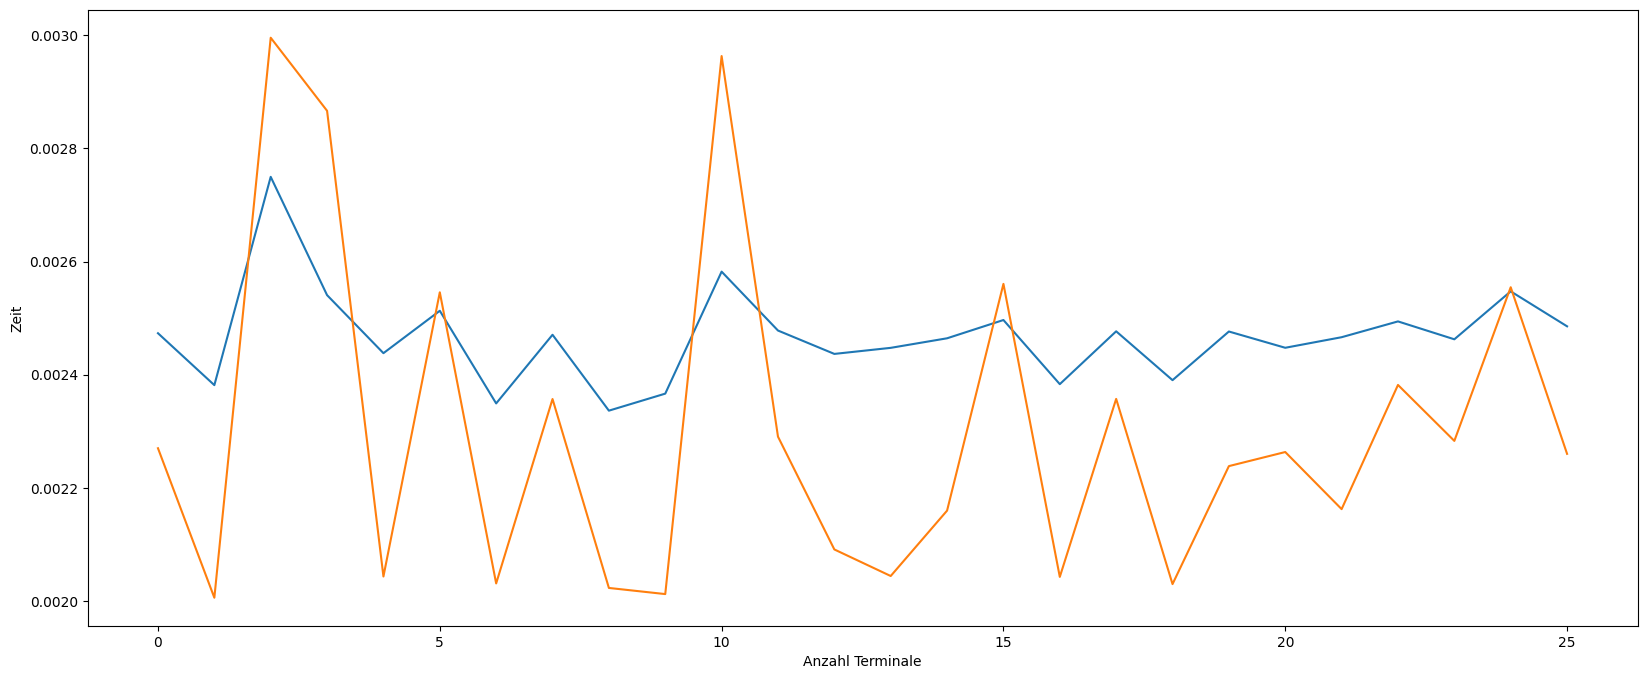

In [136]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(timeVariableTerminalsMean)
plt.plot(timeVariableTerminalsMedian)
plt.xlabel('Anzahl Terminale')
plt.ylabel('Zeit')
plt.show()

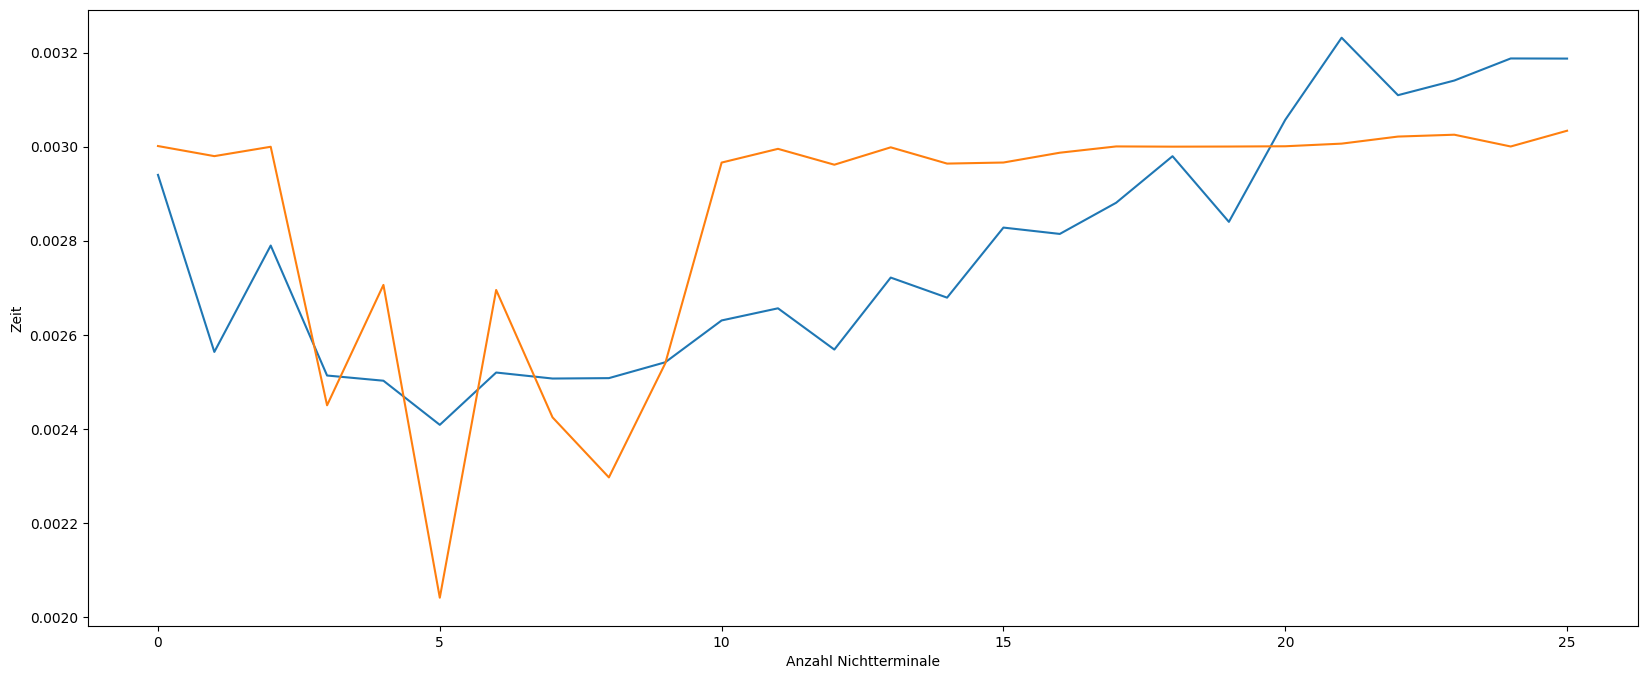

In [137]:
# Comment out the next three lines for default sizing
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(timeVariableNonTerminalsMean)
plt.plot(timeVariableNonTerminalsMedian)
plt.xlabel('Anzahl Nichtterminale')
plt.ylabel('Zeit')
plt.show()